# No35

In [1]:
!pip install mecab-python3

     |████████████████████████████████| 17.1 MB 9.5 MB/s eta 0:00:01


In [76]:
import MeCab

with open('./neko.txt') as f:
    neko = f.read()

t = MeCab.Tagger('')

with open('./neko.txt.mecab', mode='w') as f:
    f.write(t.parse(neko))

In [77]:
def neko_lines():

    with open('./neko.txt.mecab') as f:
        morphemes = []
        for line in f:
            cols = line.split('\t')
            if (len(cols) < 2):
                raise StopIteration
            res_cols = cols[1].split(',')

            morpheme = {
                'surface': cols[0],
                'base': res_cols[6],
                'pos': res_cols[0],
                'pos1': res_cols[1],
            }

            morphemes.append(morpheme)
            
            # 句点で一文と判定させる
            if res_cols[1] == '句点':
                # yieldで一文をシーケンスとして持たせてその後変数を初期化する
                yield morphemes
                morphemes = []
lines = neko_lines()
for i, line in enumerate(lines):
#     print(line)
    if i > 50:
        break

In [64]:
lines = neko_lines()
tmp_dict = {}
for i, line in enumerate(lines):
#     print(line)
    for sentense in line:
#         print(sentense['surface'])
        if sentense['surface'] in tmp_dict.keys():
            tmp_dict[sentense['surface']] += 1
        else:
            tmp_dict[sentense['surface']] = 1
        
#         if sentense['surface']
#     tmp_list.append(line)
    
#     if i > 10000:
#         break

import operator
word_list = sorted(tmp_dict.items(), key=operator.itemgetter(1),reverse=True)
key_list = []
val_list = []
for word in word_list:
    key_list.append(word[0])
    val_list.append(word[1])

In [60]:
cnt_list = sorted(tmp_dict.values(), reverse=True)

# No36

<BarContainer object of 10 artists>

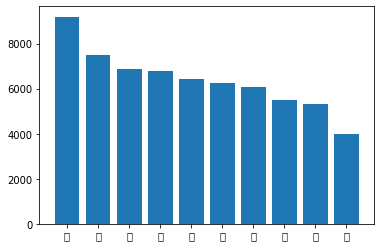

In [65]:
import matplotlib.pyplot as plt

plt.bar(key_list[:10], val_list[:10])

In [70]:
!pip install japanize_matplotlib

     |████████████████████████████████| 4.1 MB 3.4 MB/s eta 0:00:01
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-py3-none-any.whl size=4120190 sha256=bf468b69add7963050e44ed11654f093f1d70254f697c7090d8e152611e891fe
  Stored in directory: /root/.cache/pip/wheels/b8/71/bc/6a1a58cd7cc4bce671a46deb4ded4d1ef1d7327209d5ab4680
Successfully built japanize-matplotlib


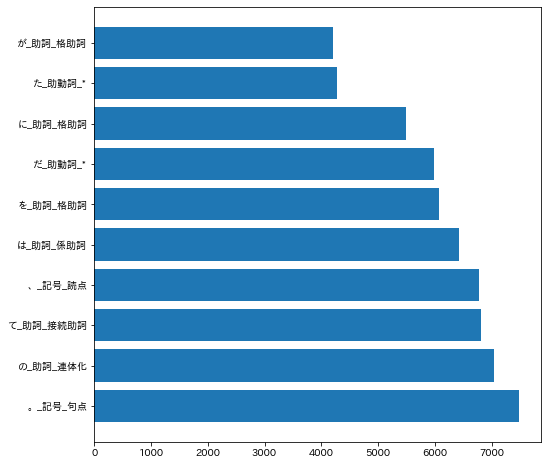

In [71]:
from collections import defaultdict
import matplotlib.pyplot as plt
import japanize_matplotlib


def parseMecab(block):
    res = []
    for line in block.split('\n'):
        if line == '':
            return res
        (surface, attr) = line.split('\t')
        attr = attr.split(',')
        lineDict = {
            'surface': surface,
            'base': attr[6],
            'pos': attr[0],
            'pos1': attr[1]
        }
        res.append(lineDict)


def extract(block):
    return [b['base'] + '_' + b['pos'] + '_' + b['pos1'] for b in block]


filename = 'neko.txt.mecab'
with open(filename, mode='rt', encoding='utf-8') as f:
    blockList = f.read().split('EOS\n')
blockList = list(filter(lambda x: x != '', blockList))
blockList = [parseMecab(block) for block in blockList]
wordList = [extract(block) for block in blockList]
d = defaultdict(int)
for word in wordList:
    for w in word:
        d[w] += 1
ans = sorted(d.items(), key=lambda x: x[1], reverse=True)[:10]
labels = [a[0] for a in ans]
values = [a[1] for a in ans]
plt.figure(figsize=(8, 8))
plt.barh(labels, values)
plt.show()

# No37

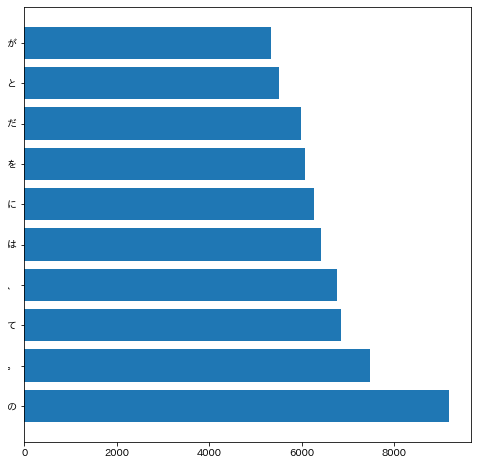

In [85]:
from collections import defaultdict
import matplotlib.pyplot as plt
import japanize_matplotlib


def parseMecab(block):
    res = []
    for line in block.split('\n'):
        if line == '':
            return res
        (surface, attr) = line.split('\t')
        attr = attr.split(',')
        lineDict = {
            'surface': surface,
            'base': attr[6],
            'pos': attr[0],
            'pos1': attr[1]
        }
        res.append(lineDict)


def extract(block):
#     return [b['base'] + '_' + b['pos'] + '_' + b['pos1'] for b in block]
    return [b['base'] for b in block]


filename = 'neko.txt.mecab'
with open(filename, mode='rt', encoding='utf-8') as f:
    blockList = f.read().split('EOS\n')
blockList = list(filter(lambda x: x != '', blockList))
blockList = [parseMecab(block) for block in blockList]
wordList = [extract(block) for block in blockList]
wordList = list(filter(lambda x: '猫' in x, wordList))
# print(wo)
d = defaultdict(int)
for word in wordList:
    for w in word:
        if w != '猫':
            d[w] += 1
ans = sorted(d.items(), key=lambda x: x[1], reverse=True)[:10]
labels = [a[0] for a in ans]
values = [a[1] for a in ans]
plt.figure(figsize=(8, 8))
plt.barh(labels, values)
plt.show()

# No38

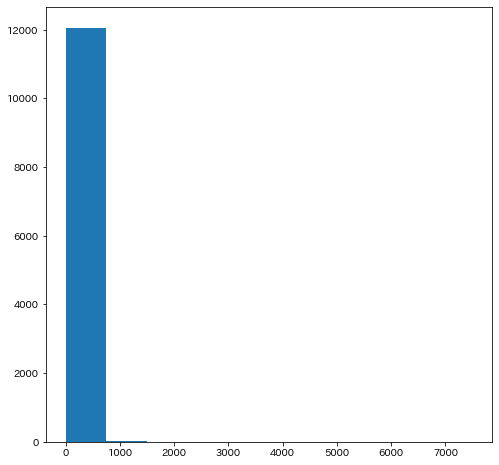

In [88]:
from collections import defaultdict
import matplotlib.pyplot as plt
import japanize_matplotlib


def parseMecab(block):
    res = []
    for line in block.split('\n'):
        if line == '':
            return res
        (surface, attr) = line.split('\t')
        attr = attr.split(',')
        lineDict = {
            'surface': surface,
            'base': attr[6],
            'pos': attr[0],
            'pos1': attr[1]
        }
        res.append(lineDict)


def extract(block):
    return [b['base'] + '_' + b['pos'] + '_' + b['pos1'] for b in block]


filename = 'neko.txt.mecab'
with open(filename, mode='rt', encoding='utf-8') as f:
    blockList = f.read().split('EOS\n')
blockList = list(filter(lambda x: x != '', blockList))
blockList = [parseMecab(block) for block in blockList]
wordList = [extract(block) for block in blockList]
d = defaultdict(int)
for word in wordList:
    for w in word:
        d[w] += 1
ans = sorted(d.items(), key=lambda x: x[1], reverse=True)[:]
labels = [a[0] for a in ans]
values = [a[1] for a in ans]
plt.figure(figsize=(8, 8))
plt.hist(values)
plt.show()


# No39

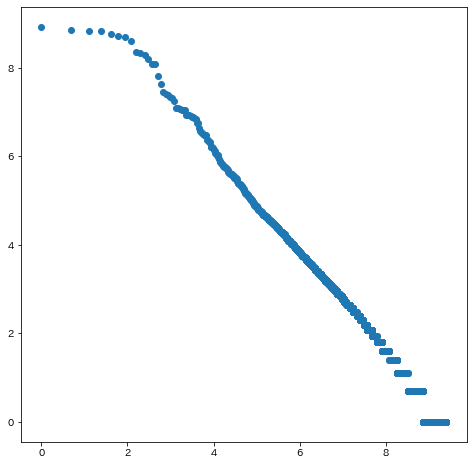

In [90]:
import math
from collections import defaultdict
import matplotlib.pyplot as plt


def parseMecab(block):
    res = []
    for line in block.split('\n'):
        if line == '':
            return res
        (surface, attr) = line.split('\t')
        attr = attr.split(',')
        lineDict = {
            'surface': surface,
            'base': attr[6],
            'pos': attr[0],
            'pos1': attr[1]
        }
        res.append(lineDict)


def extract(block):
    return [b['base'] + '_' + b['pos'] + '_' + b['pos1'] for b in block]


filename = 'neko.txt.mecab'
with open(filename, mode='rt', encoding='utf-8') as f:
    blockList = f.read().split('EOS\n')
blockList = list(filter(lambda x: x != '', blockList))
blockList = [parseMecab(block) for block in blockList]
wordList = [extract(block) for block in blockList]
d = defaultdict(int)
for word in wordList:
    for w in word:
        d[w] += 1
ans = sorted(d.items(), key=lambda x: x[1], reverse=True)
ranks = [math.log(r + 1) for r in range(len(ans))]
values = [math.log(a[1]) for a in ans]
plt.figure(figsize=(8, 8))
plt.scatter(ranks, values)
plt.show()